너무 많은 사진이 업로드 되어 저장 공간이 부족해졌다. 업로드된 사진의 용량을 줄일 수 있는 방법이 필요하다.

### 차원과 차원 축소  
데이터가 가진 속성을 특성이라고 불러왔다. 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈이다.  
머신러닝에서는 이런 특성을 **차원(dimension)**이라고도 부른다.  
10,000개의 특성은 결국 10,000개의 차원이라는 것인데 이 차원을 줄일 수 있다면 저장 공간을 크게 줄일 수 있을 것이다.

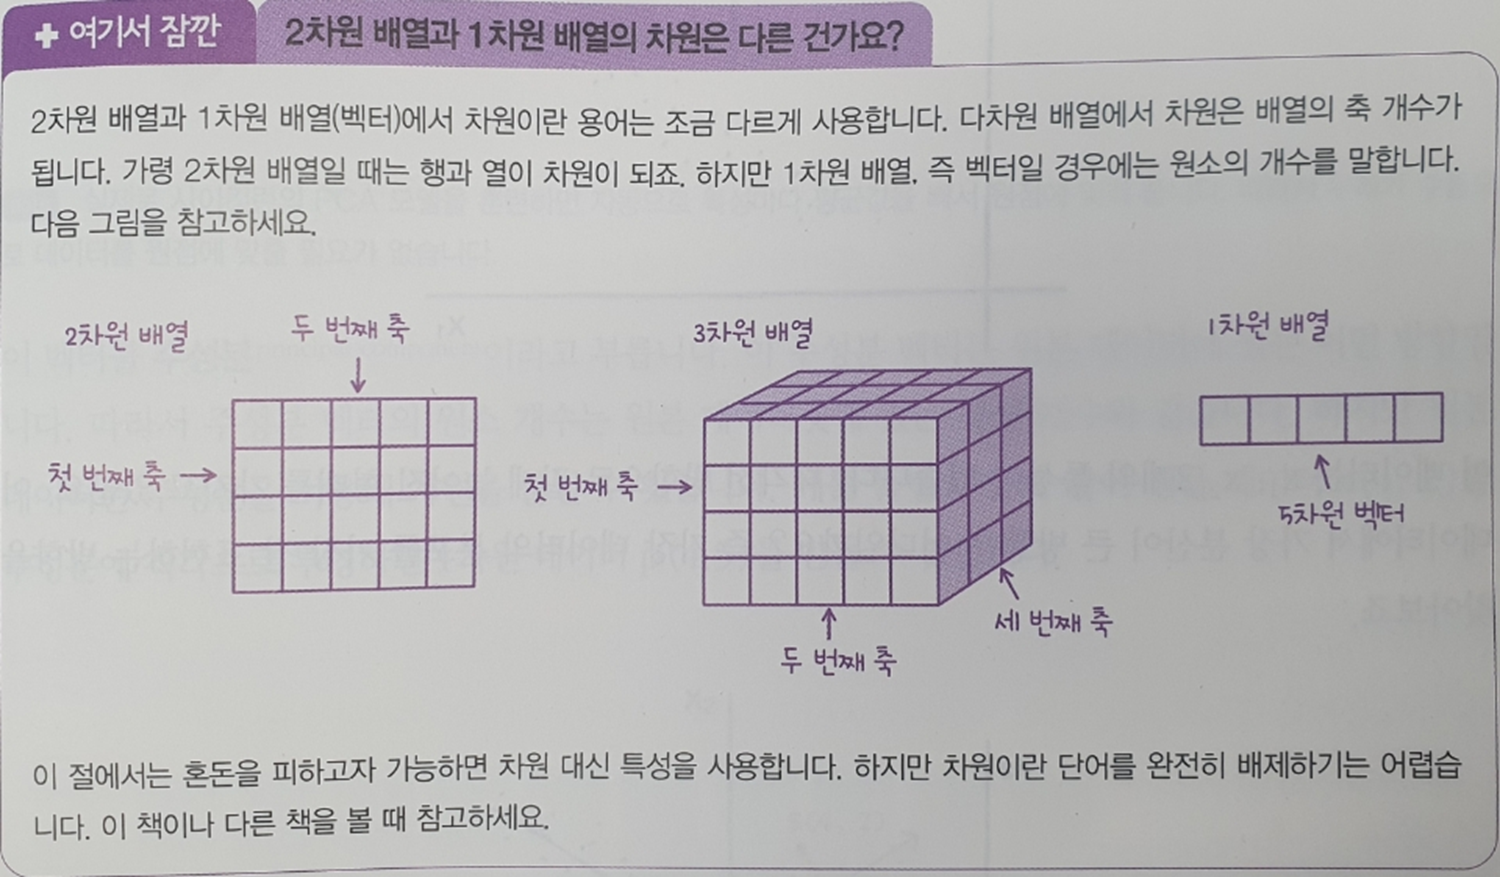

이를 위해 비지도 학습 작업 중 하나인 **차원 축소(dimensionality reduction)**알고리즘을 다루어 보자.  
3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.  
  
또한 줄어든 차원에서 다시 원본 차원(예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이면서 복원할 수도 있다.  
이 절에서는 대표적인 차원 축소 알고리즘인 **주성분 분석(principal component analysis)**을 배워보자.
  
주성분 분석을 간단히 **PCA**라고 부른다.

### 주성분 분석 소개  
주성분 분석(PCA)은 데이터에 있는 분산이 가장 큰 방향을 찾는 것으로 이해할 수 있다. 분산은 데이터가 널리 퍼져있는 정도를 말한다.  
분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다. 이해하기 쉽도록 다음과 같은 2차원 데이터를 생각해보자.

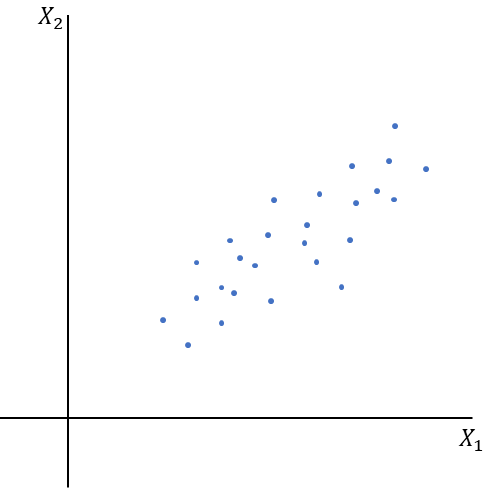

이 데이터는 x<sub>1</sub> x<sub>2</sub> 2개의 특성이 있다. 대각선 방향으로 길게 늘어진 형태를 가지고 있다. 이 데이터에서 가장 분산이 큰 방향은 어디일까? 즉 가장 데이터의 분포를 가장 잘 표현하는 방향을 찾아보자.

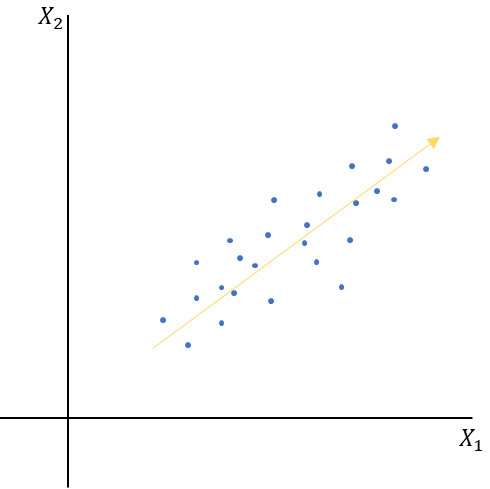

직관적으로 우리는 길게 늘어진 대각선 방향이 분산이 크다고 알 수 있다. 위의 그림에서 화살표 위치는 큰 의미가 없다. 오른쪽 위로 향하거나 왼쪽 아래로 향할 수도 있다. 중요한 것은 분산이 큰 방향을 찾는 것이 중요하다.  
  
앞에서 찾은 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있다. 예를 들어 다음 그림의 (2,1)처럼 나타낼 수 있다.  
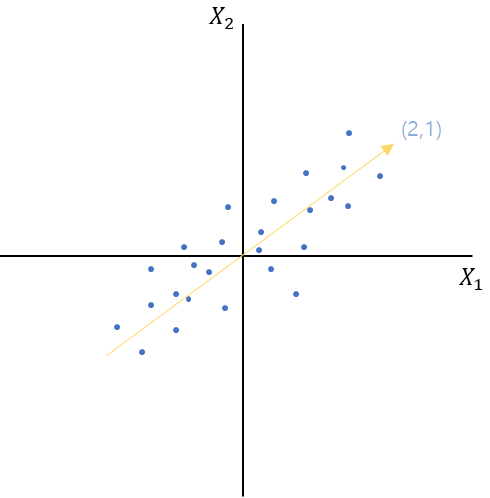  
실제로 사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰주므로 수동으로 데이터를 원점에 맞출 필요가 없다.

이 벡터를 **주성분(principal component)**라고 부른다. 이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.  
하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.  
  
예를 들면 다음과 같이 샘플 데이터 s(4,2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4.5)를 만들 수 있다.  
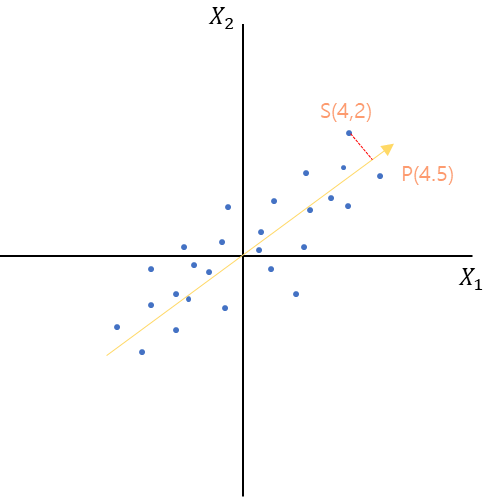  
  
주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다. 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.  
  
첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두 번째 주성분이다. 여기서는 2차원이기 때문에 두 번째 주성분의 방향은 다음처럼 하나 뿐이다.  
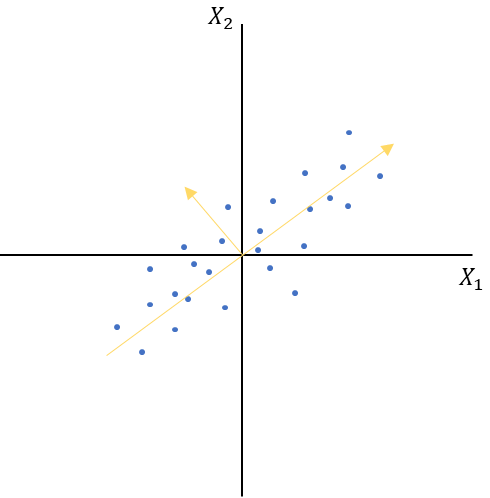  
  
일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.  
지금까지 주성분의 특징을 알아보았다. 사이킷런으로 과일 사진 데이터에서 주성분 분석을 수행해 보자.  
  
*기술적인 이유로 주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있다. 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다고 말한다.*

### PCA 클래스  
이전 절과 마찬가지로 과일 사진 데이터를 다운로드하여 넘파이 배열로 적재한다.

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다. k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.


In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. 이 배열의 크기를 확인해 보자.

In [3]:
print(pca.components_.shape)

(50, 10000)


n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50이다. 즉 50개의 주성분을 찾았다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.  
  
원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있다. 2절에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그려보자.

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
    n = len(arr)    # n은 샘플 개수이다.
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))    # np.ceil은 주어진 숫자와 같은 정수 또는 주어진 숫자보다 큰 가장 가까운 정수를 반환(올림)
    # 행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개 까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r') # 밑에서 arr에 fruits[km.labels_ == 0]이라는 3차원 배열을 입력한다.
                axs[i, j].axis('off')
    plt.show()

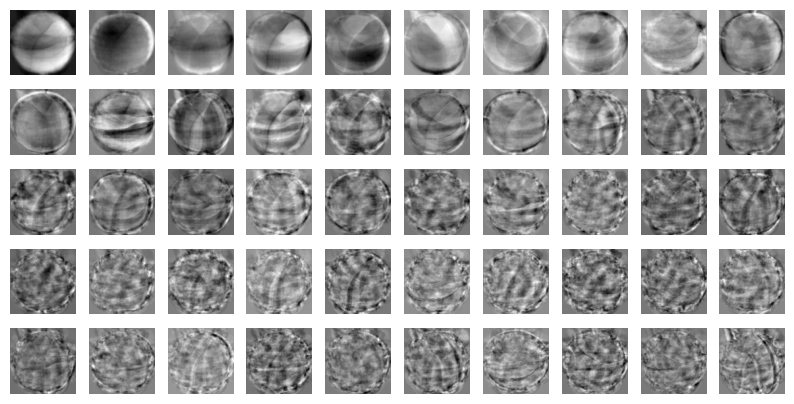

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.  
  
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. 이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수도 있다.  
PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보자.

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d는 (300, 10000) 크기의 배열이었다. 10,000개의 픽셀(특성)을 가진 300개의 이미지이다. 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환했다.  
이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.  
  
데이터를 1/200으로 줄일 수 있었다. fruits_2d 대신 fruits_pca를 저장한다면 훨씬 공간을 줄일 수 있다. 데이터의 차원을 줄였다면 다시 원상 복구할 수 있을지 알아보자.

### 원본 데이터 재구성  
앞에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수 밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.  
  
PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원해 보자.

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


예상대로 10,000개의 특성이 복원되었다. 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력해 보자. 이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 담고 있다.

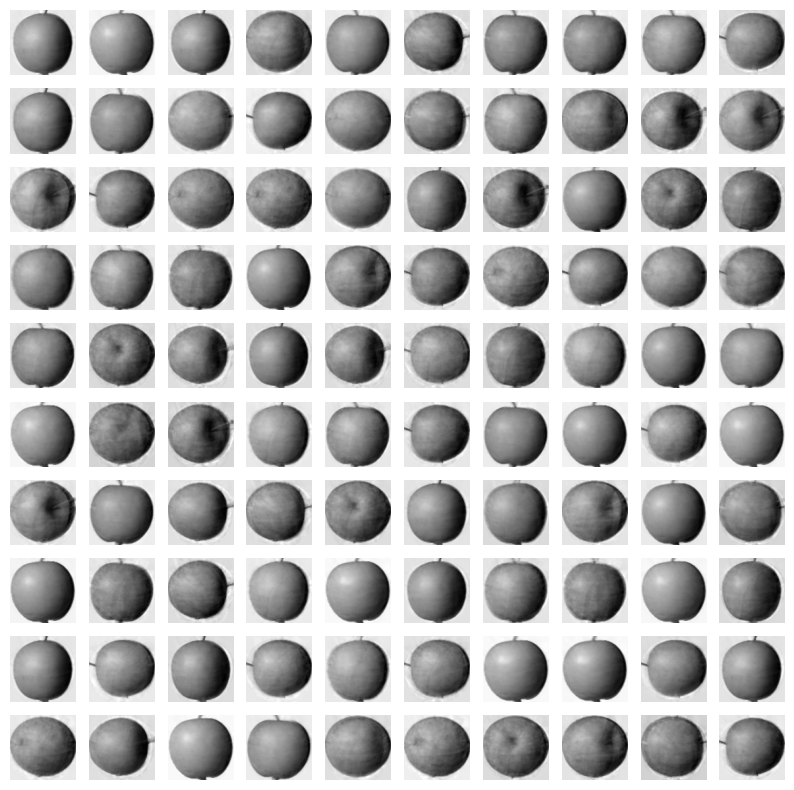

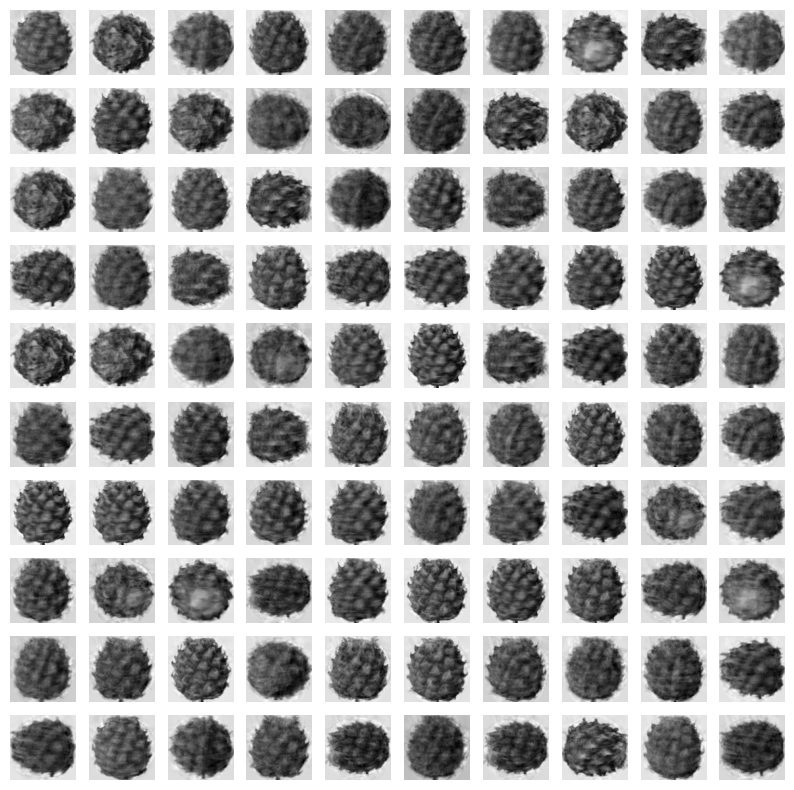

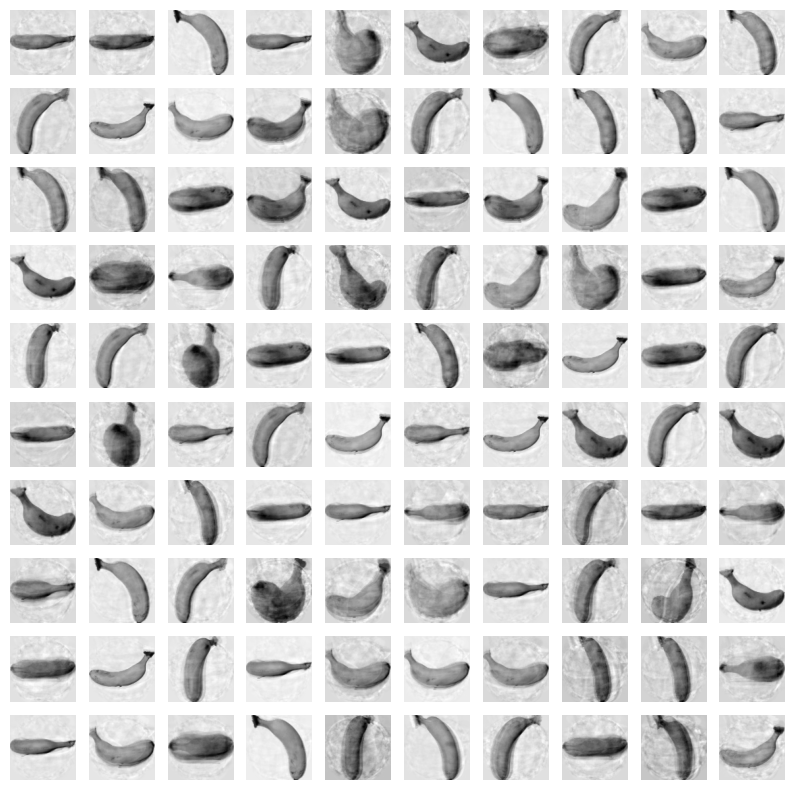

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

거의 모든 과일이 잘 복원되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린 것을 감안한다면 잘 되었다. 이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.  
  
만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것인지 알아보자.

### 설명된 분산  
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산(explained variance)**라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.  
당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.  
*설명된 분산은 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값이다.*

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215454925751768


92%가 넘는 분산을 유지한다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기에서 찾을 수 있다. 설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 된다. 맷플롯립의 plot() 함수로 설명된 분산을 그래프로 출력해 보자.

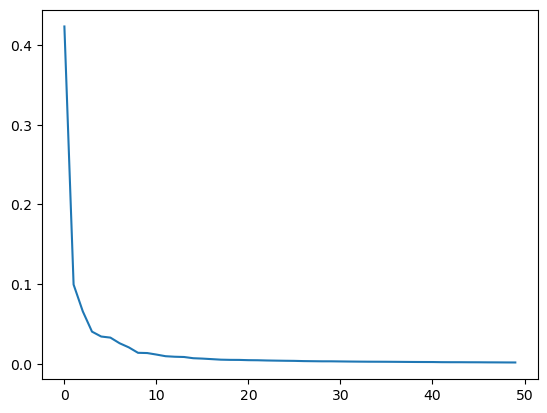

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다.  
이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련해 보자. 원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해 보자.

### 다른 알고리즘과 함께 사용하기  
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아 보자.  
3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용한다. 먼저 사이킷런의 LogisticRegression 모델을 만든다.

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 한다. 여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정한다. 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다.  
이를 이용하면 100개의 0, 100개의 1, 100개의 2로 이루어진 타겟 데이터를 쉽게 만들 수 있다.

In [13]:
target = np.array([0]*100 + [1]*100 + [2]*100)

먼저 원본 데이터인 fruits_2d를 사용해 보자. 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증을 수행한다.

In [14]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6068487644195557


교차 검증의 점수는 0.997 정도로 높다. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다. cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있다. 0.61초 정도 걸렸다.  
이 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교해 보자.

In [15]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.028583335876464843


50개의 특성만 사용했는데도 정확도가 100%이고 훈련 시간은 0.03초로 대폭 줄어들었다. PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.  
  
앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. PCA 클래스는 지정된 비율에 도달할 떄까지 자동으로 주성분을 찾는다. 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보자.

In [16]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

주성분 개수 대신 0~1 사이의 비율을 입력하면 된다. 몇 개의 주성분을 찾았는지 확인해 보자.

In [17]:
print(pca.n_components_)

2


단 2개의 특성으로 원본 데이터의 있는 분산의 50%를 표현할 수 있다.  
이 모델로 원본 데이터를 변환해 보자. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 될 것이다.

In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용하고도 교차 검증의 결과가 좋을 지 확인해 보자.

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

C:\Users\6709456\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.06296334266662598


C:\Users\6709456\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


코드를 실행했을 시 나타나는 경고(Convergence Warning : lbfgs failed to converge)는 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고이다. 하지만 교차 검증의 결과가 충분히 좋기 때문에 무시해도 좋다.

2개의 특성을 사용했지만 99%의 정확도를 달성했다.  
  
이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자.

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

C:\Users\6709456\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\6709456\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


fruits_pca로 찾은 클러스터는 각각 110, 99, 91개의 샘플을 포함하고 있다. 이는 2절에서 원본 데이터를 사용했을 떄와 거의 비슷한 결과이다. KMeans가 찾은 레이블을 사용해 과일 이미지를 출력해 보자.

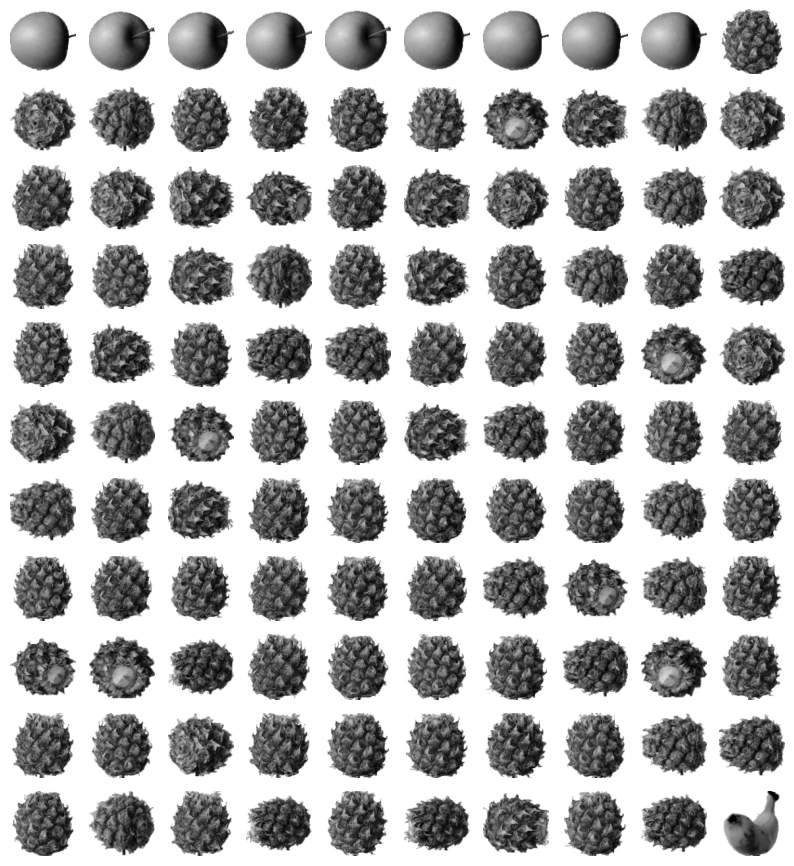

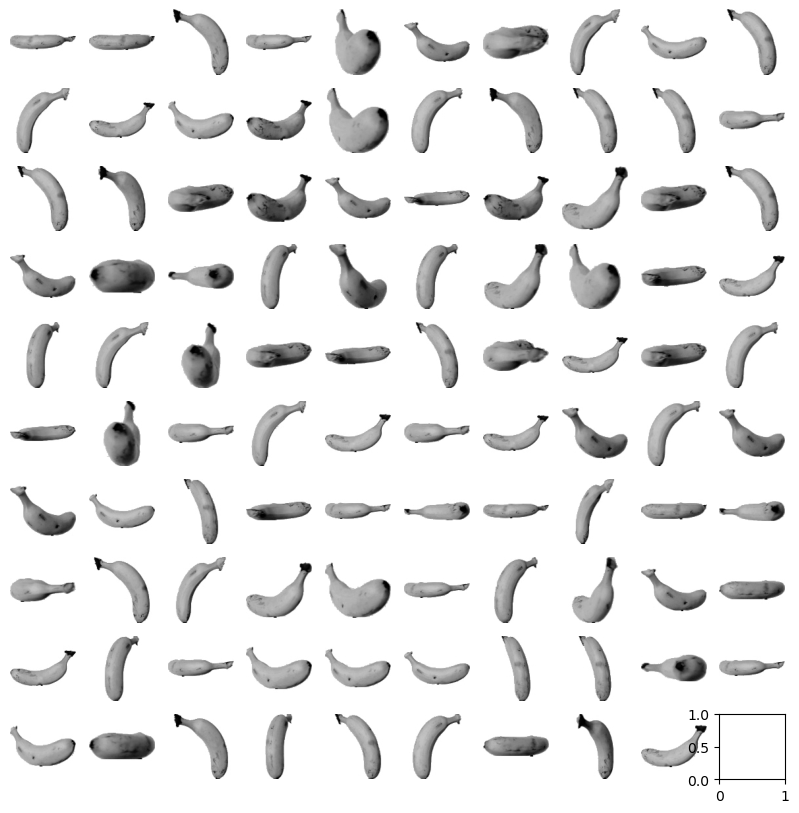

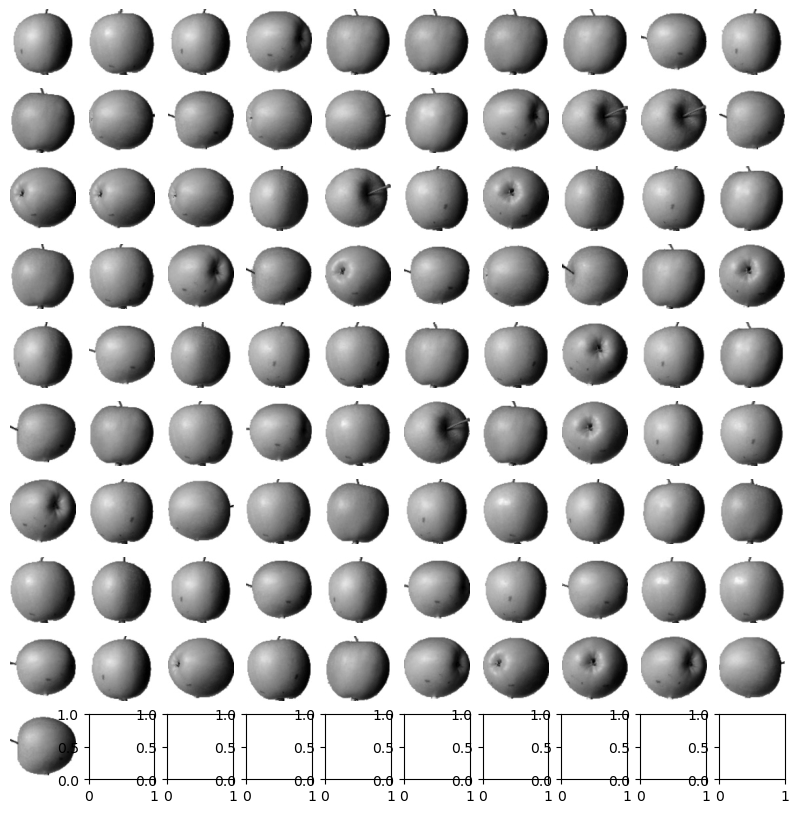

In [21]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈된다. 몇 개의 사과와 1개의 바나나가 파인애플 클러스터에 섞여 들어가 있다.  
  
훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다. 앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려 보자.

In [22]:
# 산점도 그리기 전에 내가 궁금해서 출력해보는 fruits_pca. 
print(fruits_pca)
# 주성분이 2개(차원이 2개)로 줄어있다. 총 300개이고 1행 2열의 배열

[[-2778.41779459 -1571.87380954]
 [-3078.27365136 -2739.27040962]
 [-2620.61072939 -1486.87055253]
 [-3113.71771062 -2530.02283015]
 [-2520.64705144 -2330.64791173]
 [-1556.73860341   123.05166122]
 [-2711.38755162 -1857.35297386]
 [-2884.74283654 -1836.15286362]
 [-2310.99240338 -2660.46264957]
 [-1521.26665012 -2445.37438374]
 [-2486.91643797 -1475.55043726]
 [-2800.83912843 -2001.07115818]
 [-2810.56248913 -2034.36322556]
 [-2209.09841637 -2303.76592225]
 [-2917.38810303 -2438.42530884]
 [-2198.1718942   -636.80184589]
 [-2317.61818126 -2704.80151487]
 [-3289.84664277 -2436.3934378 ]
 [-2641.95018377   503.74908687]
 [-3563.8760831  -1290.01167006]
 [-3708.64597097 -1575.33617706]
 [-2423.96625858 -2080.63343889]
 [-3169.13983546 -2238.74224157]
 [-3059.33441459 -2250.14899831]
 [-2745.8264558  -2276.96357422]
 [-3185.62291444  -958.24335683]
 [-2971.17053083  -250.76949659]
 [-2787.48896668 -2602.75971447]
 [-3498.88592281 -1937.32351269]
 [-3260.68825045  -265.30039087]
 [-2623.54

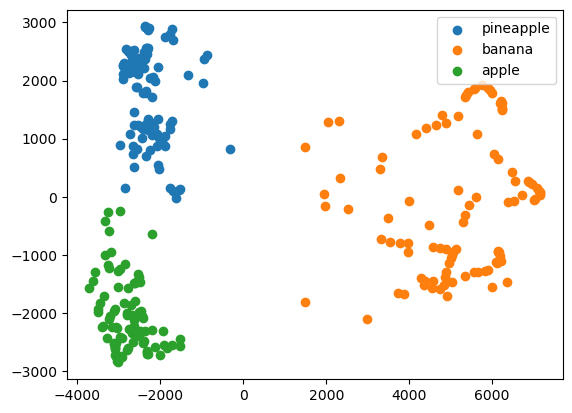

In [23]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1]) # 주성분이 2개(차원이 2개)이므로 x, y 값처럼 나타낼 수 있어 산점도로 그릴 수 있다.
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

2개의 특성만을 사용하여도 각 클러스터의 산점도가 아주 잘 구분된다.  
사과와 파인애플 클러스터 경계가 가깝게 붙어 있어 두 클러스터의 샘플은 몇 개가 혼동을 일으키게 되어 있다.  
데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있고 그래서 차원 축소는 유용한 도구 중 하나이다.

### 주성분 분석으로 차원 축소(정리)  
차원 축소는 대표적인 비지도 학습 문제 중 하나이다. 차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화하기 쉽다.  
또 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.  
  
이번 절에서는 사이킷런의 PCA 클래스를 사용하여 과일 사진 데이터의 특성을 50개로 줄였다. 특성 개수는 작지만 변환된 데이터는 원본 데이터에 있는 분산의 90% 이상을 표현한다. 이를 **설명된 분산**이라 부른다.  
  
PCA 클래스는 자동으로 설명된 분산을 계산하여 제공해 준다. 또한 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.  
  
PCA 클래스는 변환된 데이터에서 원본 데이터를 복원하는 메서드도 제공한다. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않지만 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.

- **차원 축소**  
원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다. 차원 축소는 저장 공간을 줄이고 시각화하기 쉽다. 또한 알고리즘의 성능을 높일 수도 있다.  
  
  
- **주성분 분석**  
차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다. 이런 방향을 주성분이라고 부른다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.  
  
  
- **설명된 분산**
주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 장 나타내는지 기록한 것이다. 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

### scikit-learn  
- **PCA**는 주성분 분석을 수행하는 클래스이다.  
    <font color=teal>n_components</font>는 주성분의 개수를 지정한다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용한다.  
  
    <font color=teal>random_state</font>에는 넘파이 난수 시드 값을 지정할 수 있다.  
      
    <font color=teal>components_</font> 속성에는 훈련 세트에서 찾은 주성분이 저장된다.  
      
    <font color=teal>explained_variance_</font> 속성에는 설명된 분산이 저장되고, explained_variance_ratio_ 에는 설명된 분산의 비율이 저장된다.  
      
    <font color=teal>inverse_transform()</font> 메서드는 transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원한다.